In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import seaborn as sns
#from sklearn.linear_model import LinearRegression
#from sklearn.ensemble import GradientBoostingRegressor as GBR
#from sklearn import linear_model
#from sklearn.svm import SVR,SVC 
#from sklearn.model_selection import GridSearchCV
#from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
#from sklearn.neural_network import MLPRegressor,MLPClassifier
#from sklearn import tree
#from sklearn.tree import DecisionTreeRegressor
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
data = pd.read_excel('ZM-ML_Data.xlsx')
X = data.iloc[:,1:41]
Y = data.iloc[:,41]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=0)
std = StandardScaler()
X_train_std = std.fit_transform(x_train)
X_test_std = std.transform(x_test)

D:\app\anaconda\anaconda\lib\site-packages\sklearn\utils\_param_validation.py:14: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 1.21.0)
  from scipy.sparse import csr_matrix, issparse


In [2]:
train = pd.concat([X],axis=1)
train

,sol_Cn,sol_Hn,sol_On,sol_Sn,sol_Nn,sol_Pn,sol_Sin,sol_C-O,sol_C=O,sol_S=O,sol_N,sol_NH2,sol_NH,sol_P-O,sol_P=O,sol_Si-N,ani_Cn,ani_Fn,ani_Nn,ani_On,ani_Sn,ani_Pn,ani_N,ani_S=O,ani_S-N,ani_CF3,ani_S-O,ani_P-F,sol_Ɛ,sol_μ,sol_ESPmin,sol_ESPmax,ani_ESPmin,ani_ESPmax,clu_ESPmin,clu_ESPmax,clu_BE,clu_differ-MBO,differ_dE,clu_differ-BL
0,4,6,3,0,0,0,0,1,4,0,0,0,0,0,0,0,2,6,1,4,2,0,1,4,2,2,0,0,64.900,7.7828,-2.225316,2.049717,-5.137734,-1.931481,0.430358,16.519616,-0.021947,0.076947,0.249956,0.160020
1,4,8,3,0,0,0,0,1,4,0,0,0,0,0,0,0,2,6,1,4,2,0,1,4,2,2,0,0,2.990,0.5548,-1.580255,0.833204,-5.097433,-2.052819,0.921997,12.091407,-0.189036,0.027727,2.722842,0.156020
2,3,6,3,0,0,0,0,1,4,0,0,0,0,0,0,0,2,6,1,4,2,0,1,4,2,2,0,0,3.110,0.3233,-1.539192,0.863954,-5.096726,-2.048791,0.963849,12.108632,-39.545179,0.396575,1.463435,0.160260
3,3,4,3,0,0,0,0,1,4,0,0,0,0,0,0,0,2,6,1,4,2,0,1,4,2,2,0,0,92.800,7.4799,-2.182838,2.232500,-5.136782,-1.928923,-0.271766,15.628097,-0.045402,0.178126,0.252279,0.018980
4,5,10,3,0,0,0,0,1,4,0,0,0,0,0,0,0,2,6,1,4,2,0,1,4,2,2,0,0,2.830,0.6147,-1.617128,0.721281,-5.092100,-2.058098,0.974353,12.050399,-0.233979,0.430655,2.820859,0.165040
5,2,6,1,1,0,0,0,0,0,1,0,0,0,0,0,0,2,6,1,4,2,0,1,4,2,2,0,0,46.200,5.9769,-2.585603,1.761433,-5.138088,-1.934392,0.319496,15.799233,-0.081384,0.228560,0.279888,0.239820
6,3,7,1,0,1,0,0,0,0,0,1,0,0,0,0,0,2,6,1,4,2,0,1,4,2,2,0,0,36.550,5.6401,-2.377186,1.259970,-5.137353,-1.937086,0.349919,15.702712,-0.077044,0.186828,0.111235,0.241020
7,4,8,1,0,0,0,0,2,0,0,0,0,0,0,0,0,2,6,1,4,2,0,1,4,2,2,0,0,7.400,2.4400,-1.820238,0.691266,-5.125135,-1.985088,0.723241,16.211767,-0.121578,0.021490,0.929458,0.141410
8,3,6,2,0,0,0,0,4,0,0,0,0,0,0,0,0,2,6,1,4,2,0,1,4,2,2,0,0,7.340,1.6212,-1.399785,1.015987,-5.124972,-1.985524,0.815544,16.457682,-0.114794,0.001029,1.181185,0.115960
9,4,8,2,0,0,0,0,4,0,0,0,0,0,0,0,0,2,6,1,4,2,0,1,4,2,2,0,0,2.310,0.0000,-1.405527,0.742398,-5.079664,-2.079242,1.096562,13.066522,-0.270934,0.129347,3.803478,0.094270


In [4]:
#模型
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()       
model.fit(X_train_std,y_train)   
  

RandomForestRegressor()

0  折 RandomForestRegressor:    0.021322172941491305 

1  折 RandomForestRegressor:    0.01122599189242736 

2  折 RandomForestRegressor:    0.005059241043145564 

3  折 RandomForestRegressor:    0.005305885322121086 

4  折 RandomForestRegressor:    0.011119979101592826 

     R2: 0.118176
     MAE: 0.056600
     MSE: 0.005432
     RMSE:0.073700


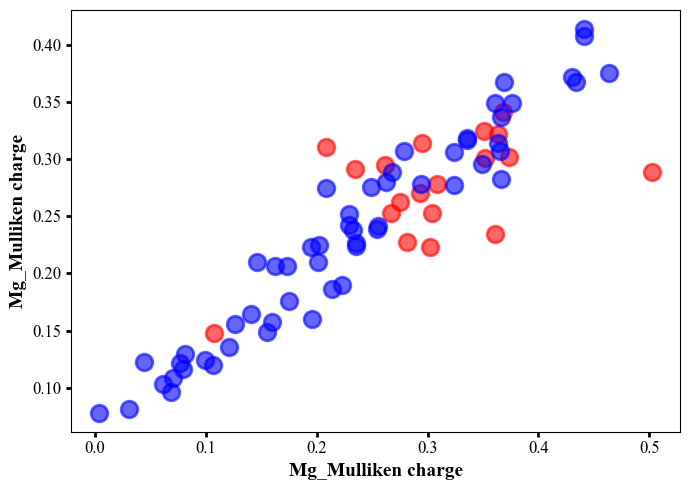

In [5]:
y_pred = model.predict(X_test_std)
y_pred_train = model.predict(X_train_std)

from sklearn.model_selection import KFold
KF = KFold(n_splits = 5)
for k, (train_index, test_index) in enumerate(KF.split(X,Y)):
    train_data,test_data,train_target,test_target = X.iloc[train_index],X.iloc[test_index],Y.iloc[train_index],Y.iloc[test_index]
    model.fit(train_data, train_target)
    #score_train = metrics.mean_squared_error(train_target, model.predict(train_data))
    score_test = metrics.mean_squared_error(test_target, model.predict(test_data))
    #print(k, " 折", "RandomForestRegressor train MSE:   ", score_train)
    print(k, " 折", "RandomForestRegressor:   ", score_test, '\n')  

print("     R2: %f" % metrics.r2_score(y_test, y_pred))
print("     MAE: %f" % metrics.mean_absolute_error(y_test, y_pred))
print("     MSE: %f" % metrics.mean_squared_error(y_test, y_pred))
print("     RMSE:%f" % math.sqrt(metrics.mean_squared_error(y_test, y_pred)))

%matplotlib inline

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)

ax.plot(y_test,y_pred,'o',color='r',alpha=0.6,markersize='12',markeredgewidth=2)
ax.plot(y_train,y_pred_train,'o',color='b',alpha=0.6,markersize='12',markeredgewidth=2)

ax.set_xlabel ('Mg_Mulliken charge',fontsize=14,fontweight='bold')
ax.set_ylabel ('Mg_Mulliken charge',fontsize=14,fontweight='bold')

plt.rcParams['font.sans-serif'] = ['Times New Roman']  # 设置字体为新罗马
plt.rcParams['axes.unicode_minus'] = False  # 用于正常显示负号（-）

plt.tick_params ('both',width=2,labelsize=12)
plt.tight_layout()
plt.show()

ani_ESPmin 0.25422938678983786
clu_differ-BL 0.14850481946794988
sol_Ɛ 0.10065370665423855
sol_ESPmin 0.07685765662435678
clu_differ-MBO 0.06765388795001234
ani_ESPmax 0.06256830872061839
sol_C-O 0.033730607048854555
clu_ESPmin 0.029987036383086942
clu_ESPmax 0.029876684597973165
clu_BE 0.028087162783147098
sol_μ 0.027471441700705715
sol_ESPmax 0.02601241925754212
differ_dE 0.0251606374175531
sol_Hn 0.01727248884750956
ani_Fn 0.016667353863858966
sol_On 0.009779363928185628
ani_S-O 0.009762701738274197
sol_Cn 0.007558357061352467
sol_C=O 0.006591136346071033
ani_N 0.0054487671059984585
sol_P-O 0.0026226991568748816
sol_Nn 0.002163106984980614
sol_Pn 0.0019170084728140112
sol_N 0.001865581475713596
sol_NH2 0.0017782243670010503
ani_P-F 0.001401838068007755
ani_Sn 0.0012330551939093936
ani_On 0.0008953246898397278
sol_NH 0.0005705069347914809
ani_Pn 0.0005516528322280335
sol_Sin 0.000355149378888802
sol_P=O 0.000169636085780404
ani_Nn 0.00012991092738756733
ani_S=O 0.00012653656739651487

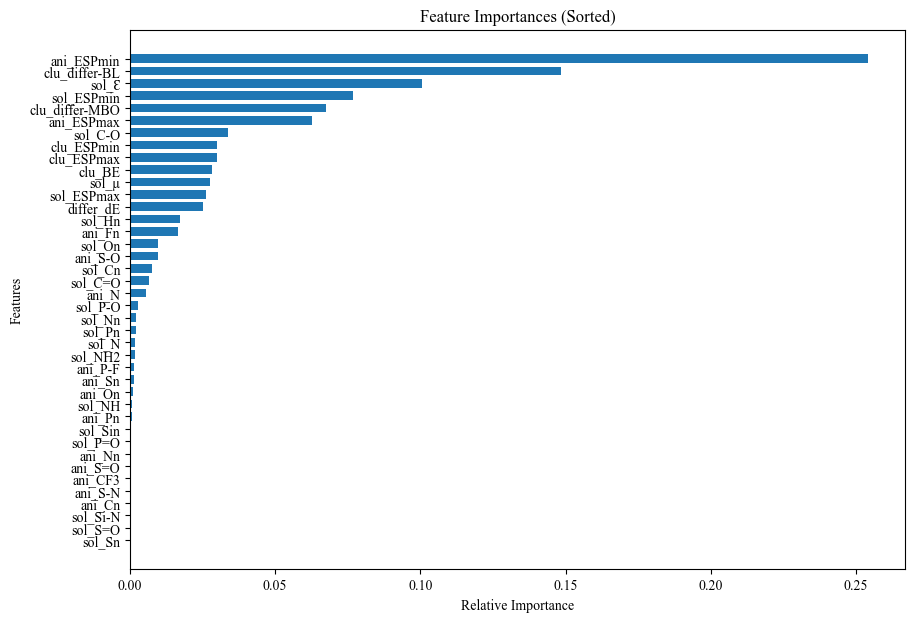

In [6]:
# 重要性
column = data.columns.tolist()[1:41]
feature_importances = model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_columns = [column[i] for i in sorted_indices]

# 打印排序后的特征重要性和对应的列名
for a, b in zip(sorted_columns, feature_importances[sorted_indices]):
    print(a, b)

# 绘制特征重要性条形图
plt.rcParams['font.sans-serif'] = ['Times New Roman']  # 设置字体为新罗马
plt.rcParams['axes.unicode_minus'] = False  # 用于正常显示负号（-）

plt.figure(figsize=(10, 7))
plt.barh(sorted_columns, feature_importances[sorted_indices], height=0.7)
plt.xlabel('Relative Importance')  # x 轴
plt.ylabel('Features')  # y轴
plt.title('Feature Importances (Sorted)')  # 标题
plt.gca().invert_yaxis()  # 反转y轴，使得重要性从高到低显示
plt.show()

ani_ESPmin 0.25422938678983786
clu_differ-BL 0.14850481946794988
sol_Ɛ 0.10065370665423855
sol_ESPmin 0.07685765662435678
clu_differ-MBO 0.06765388795001234
ani_ESPmax 0.06256830872061839
sol_C-O 0.033730607048854555
clu_ESPmin 0.029987036383086942
clu_ESPmax 0.029876684597973165
clu_BE 0.028087162783147098


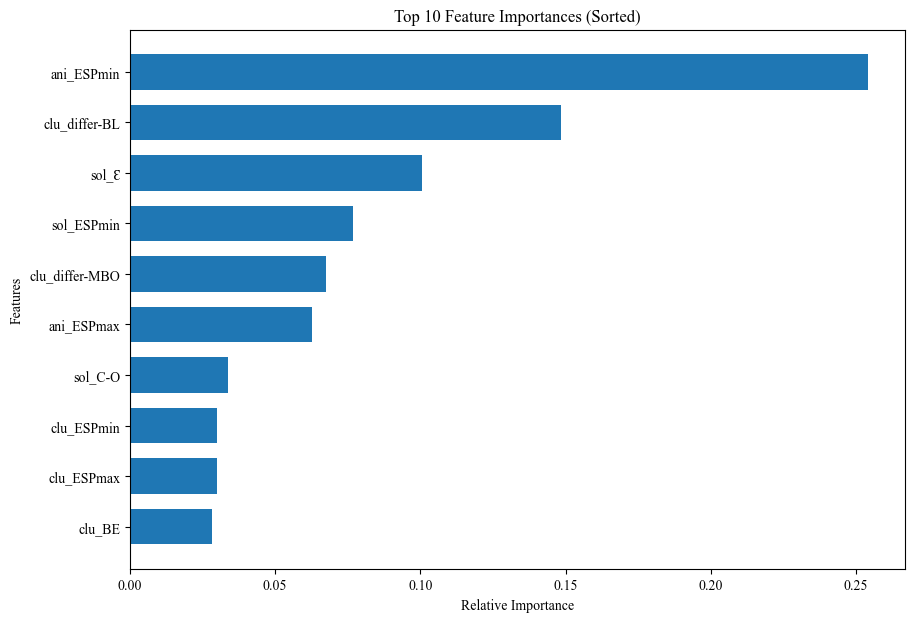

In [7]:
# 重要性top10
column = data.columns.tolist()[1:41]
feature_importances = model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_columns = [column[i] for i in sorted_indices]

# 仅取前10名重要特征
top_n = 10
top_columns = sorted_columns[:top_n]
top_importances = feature_importances[sorted_indices][:top_n]

# 打印排序后的特征重要性和对应的列名
for a, b in zip(top_columns, top_importances):
    print(a, b)

# 绘制特征重要性条形图
plt.rcParams['font.sans-serif'] = ['Times New Roman']  # 设置字体为新罗马
plt.rcParams['axes.unicode_minus'] = False  # 用于正常显示负号（-）

plt.figure(figsize=(10, 7))
plt.barh(top_columns, top_importances, height=0.7)
plt.xlabel('Relative Importance')  # x 轴
plt.ylabel('Features')  # y轴
plt.title('Top 10 Feature Importances (Sorted)')  # 标题
plt.gca().invert_yaxis()  # 反转y轴，使得重要性从高到低显示
plt.show()

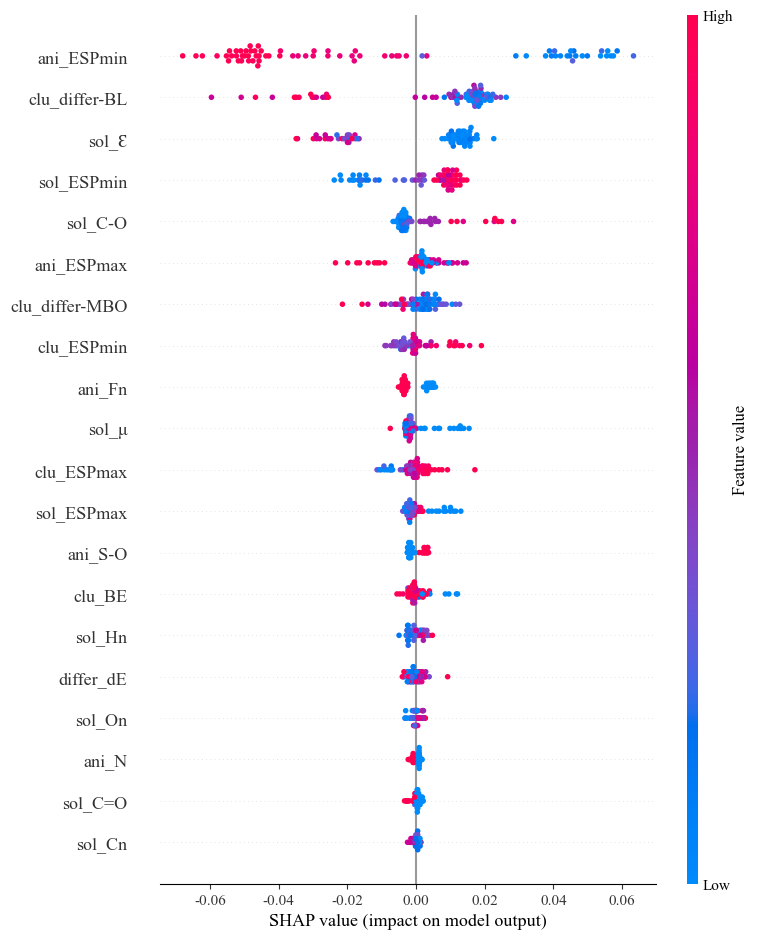

In [8]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X) 
shap.summary_plot(shap_values, X)